## <span style="color:blue"> 彩色與灰階影像表示方式 </span>
1. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_COLOR)載入一張3通道彩色影像(cv2.IMREAD_COLOR為訂定參數)。
2. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_GRAYSCALE)載入一張1通道灰階影像。
3. img1 = cv2.imread('./test_data/lenna.png',cv2.IMREAD_UNCHANGED)視影像檔格式載入影像。

下面程式載入一張彩色影像。

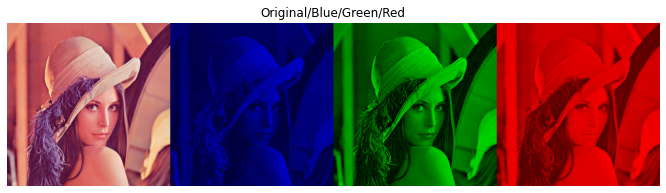

In [2]:
try:
    import cv2
except:
    # !pip install opencv-python
    import cv2

try:
    import tensorflow as tf
except:
    # !pip install tensorflow
    import tensorflow as tf
    
import numpy as np
import matplotlib.pyplot as plt
    
# %matplotlib inline

url='https://tronclass.ntou.edu.tw/api/uploads/1842790/in-rich-content?created_at=2021-04-23T04:24:26Z'
lenna_srcfile=tf.keras.utils.get_file('lenna',origin=url)

img1 = cv2.imread(lenna_srcfile)
#   cv2.imread('./xxx',cv2.IMREAD_COLOR)載入一張3通道彩色影像(cv2.IMREAD_COLOR為訂定參數)
#   cv2.imread('./xxx',cv2.IMREAD_GRAYSCALE)載入一張1通道灰階影像。
#   cv2.imread('./xxx',cv2.IMREAD_UNCHANGED)視影像檔格式載入影像。
    #?   cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
    #?   cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
    #?   cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

if img1 is None:
    print('lenna.png is not found')
img = np.zeros((img1.shape[0],img1.shape[1]*4,3),dtype=np.uint8)  
# shape[0]: height of image
# shape[1]: width of image

img[:,0:img1.shape[1],:]                 = img1        # the original image is a three-channel image
img[:,  img1.shape[1]:2*img1.shape[1],0] = img1[:,:,0] # channel 0: blue
img[:,2*img1.shape[1]:3*img1.shape[1],1] = img1[:,:,1] # channel 1: green
img[:,3*img1.shape[1]:,2]                = img1[:,:,2] # channel 2: red
plt.figure(figsize=(12,3))
plt.imshow(img[:,:,[2,1,0]])
plt.title('Original/Blue/Green/Red'), plt.axis('off')
plt.show()

下面程式載入一張灰階影像。

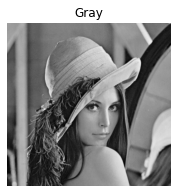

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(3,3))
plt.imshow(img1, cmap='gray')       # use the gray colormap
plt.title('Gray'), plt.axis('off')
plt.show()

改變影像的像素值影響的是影像那位置的顏色/亮度。

(512, 512)


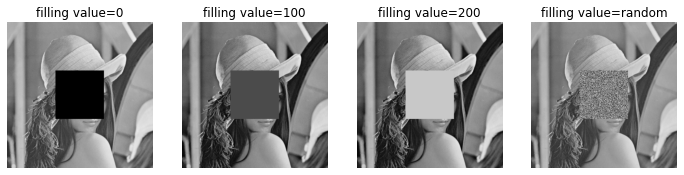

In [3]:
img1 = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
print(img1.shape)#輸出高x寬x通道數

plt.figure(figsize=(12,3))

for idx,v in enumerate([0,100,200,-1]):
#將影像中間1/3高x1/3寬處填入v
    h = img1.shape[0]//3
    w = img1.shape[1]//3
    plt.subplot(1,4,idx+1)
    if v >= 0:
        img1[h:h+h,w:w+w] = v
        plt.title('filling value='+str(v))
    else:
        img1[h:h+h,w:w+w] = np.random.randint(0,256,(img1.shape[0]//3,img1.shape[1]//3))
        plt.title('filling value=random')
    plt.imshow(img1, cmap='gray')       # use the gray colormap
    
    plt.axis('off')
plt.show()

彩色版本

(512, 512, 3)


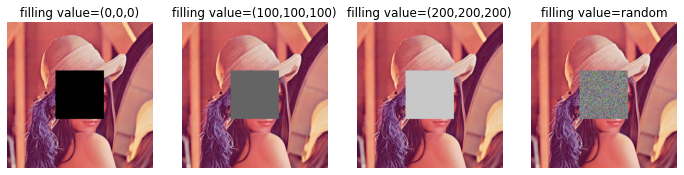

In [4]:
img1 = cv2.imread(lenna_srcfile)
print(img1.shape)#輸出高x寬x通道數

plt.figure(figsize=(12,3))

for idx,v in enumerate([0,100,200,-1]):
#將影像中間1/3高x1/3寬處填入v
    h = img1.shape[0]//3
    w = img1.shape[1]//3
    plt.subplot(1,4,idx+1)
    if v >= 0:
        img1[h:h+h,w:w+w,:] = v
        plt.title('filling value=({},{},{})'.format(v,v,v))
    else:
        img1[h:h+h,w:w+w,:] = np.random.randint(0,256,(img1.shape[0]//3,img1.shape[1]//3,3))
        plt.title('filling value=random')
    plt.imshow(img1[:,:,[2,1,0]])       # use the gray colormap
    
    plt.axis('off')
plt.show()

### <span style="color:blue; background-color:#ffd0d0">練習</span>
<div style="background-color:#ffd0d0">
仿照上例，將右下角1/4變成紅色。
</div>

## <span style="color:blue"> 頻率域影像表示方式 </span>
可以使用numpy.fft.fft2或cv2.dft將影像用Fourier transform轉換到頻率域，有利於某些分析。不過cv2.dft會快一些。

np.fft.fft2+ifft2: 0.01299 seconds
cv2.dft+cv2.idft: 0.00299 seconds


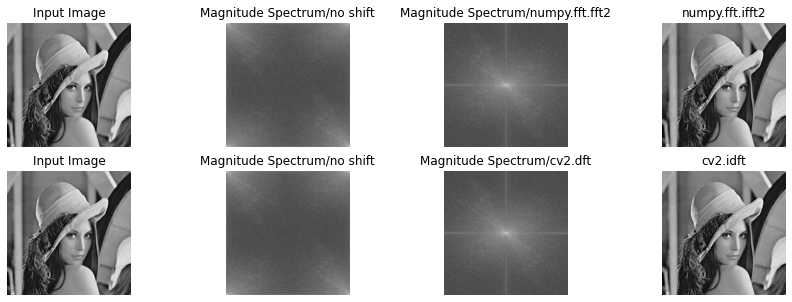

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

img = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15,5))

# using numpy.fft.fft2
a1 = time.time()
f = np.fft.fft2(img)                            # produce complex numbers
ifft_f = np.fft.ifft2(f)
print('np.fft.fft2+ifft2: {:.5f} seconds'.format(time.time()-a1))

fshift = np.fft.fftshift(f) #不是細節的係數在四個角落(低頻的部分落在四個角落)->程式難寫 
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(2,4,1),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')        #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,2),plt.imshow(np.log(np.abs(f)), cmap = 'gray')
plt.title('Magnitude Spectrum/no shift'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,3),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum/numpy.fft.fft2'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,4),plt.imshow(np.real(ifft_f), cmap = 'gray')
plt.title('numpy.fft.ifft2'), plt.axis('off') #plt.xticks([]), plt.yticks([])

# using cv2.dft
a1 = time.time()
f = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
ifft_f = cv2.idft(f)
print('cv2.dft+cv2.idft: {:.5f} seconds'.format(time.time()-a1))

fshift = np.fft.fftshift(f) 
magnitude_spectrum = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

plt.subplot(2,4,5),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.axis('off')        #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,6),plt.imshow(np.log(cv2.magnitude(f[:,:,0],f[:,:,1])), cmap = 'gray')
plt.title('Magnitude Spectrum/no shift'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,7),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum/cv2.dft'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.subplot(2,4,8),plt.imshow(np.abs(ifft_f[:,:,0]), cmap = 'gray')
plt.title('cv2.idft'), plt.axis('off') #plt.xticks([]), plt.yticks([])
plt.show()


改變頻率域影像的像素值，影響的是某種影像細節的強弱。下面是幾種典型改法:

In [6]:
def low_pass(fshift, freq):
    cy, cx = fshift.shape[0]//2,fshift.shape[1]//2 #shape 張量的形狀 第0軸跟第1軸分別有幾個點 得到列與行的中心
    h = np.arange(fshift.shape[0]).reshape((-1,1)) - cy   
    w = np.arange(fshift.shape[1]).reshape((1,-1)) - cx
    freq = freq**2
    fshift = np.where(h**2+w**2<=freq,fshift,0)
    # same python 跑這段很慢 numpy > 跑多執行續的程序 計算超過某個半徑的平方 距離原點一定距離(freq) 圓外面的射程0 園內的不動
#    for y in range(fshift.shape[0]):
#        dy = (y - cy)**2
#        for x in range(fshift.shape[1]):
#            dx = (x-cx)**2
#            if dx+dy > freq:
#                fshift[y, x] = 0
    return fshift

def high_pass(fshift, freq): # 頻率高的通過
    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
    h = np.arange(fshift.shape[0]).reshape((-1,1)) - cy   
    w = np.arange(fshift.shape[1]).reshape((1,-1)) - cx
    freq = freq**2
    fshift = np.where(h**2+w**2>=freq,fshift,0)
    
#    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
#    freq = freq**2
#    for y in range(fshift.shape[0]):
#        dy = (y - cy)**2
#        for x in range(fshift.shape[1]):
#            dx = (x-cx)**2
#            if dx+dy < freq:
#                fshift[y, x] = 0
    return fshift

def band_pass(fshift, freq_low,freq_high):  #環
    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
    h = np.arange(fshift.shape[0]).reshape((-1,1)) - cy   
    w = np.arange(fshift.shape[1]).reshape((1,-1)) - cx
    freq_low = freq_low**2
    freq_high = freq_high**2
    x = h**2+w**2
    fshift = np.where(x>=freq_low,np.where(x<=freq_high,fshift,0),0)
    
#    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
#    freq_low = freq_low**2
#    freq_high = freq_high**2
#    for y in range(fshift.shape[0]):
#        dy = (y - cy)**2
#        for x in range(fshift.shape[1]):
#            dx = (x-cx)**2
#            d = dx + dy
#            if d < freq_low or d > freq_high :
#                fshift[y, x] = 0
    return fshift

def band_reject(fshift, freq_low,freq_high):
    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
    h = np.arange(fshift.shape[0]).reshape((-1,1)) - cy   
    w = np.arange(fshift.shape[1]).reshape((1,-1)) - cx
    freq_low = freq_low**2
    freq_high = freq_high**2
    x = h**2+w**2
    fshift[np.nonzero(np.where(x>=freq_low,np.where(x<=freq_high,np.uint8(255),np.uint8(0)),np.uint8(0)))]=0
    
#    cy, cx = fshift.shape[0]/2,fshift.shape[1]/2
#    freq_low = freq_low**2
#    freq_high = freq_high**2
#    for y in range(fshift.shape[0]):
#        dy = (y - cy)**2
#        for x in range(fshift.shape[1]):
#            dx = (x-cx)**2
#            d = dx + dy
#            if d >= freq_low and d <= freq_high :
#                fshift[y, x] = 0
    return fshift
    

下面範例示範低通率波(low-pass filtering)

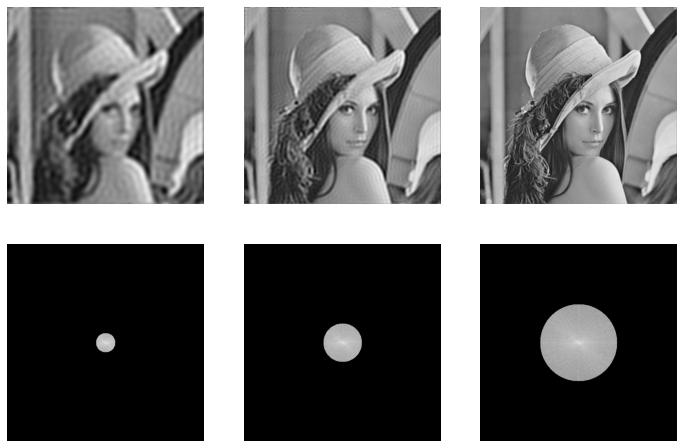

In [7]:
img = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img) # cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
fshift = np.fft.fftshift(f) #先做傅立葉轉換
# low pass
plt.figure(figsize=(12,8))

for idx,freq in enumerate([25, 50, 100]):
    low_pass_f = low_pass(fshift.copy(),freq)    
    plt.subplot(2,3,idx+4)
    plt.imshow(np.log(np.abs(low_pass_f)+0.001),cmap='gray')
    #plt.imshow(np.log(cv2.magnitude(low_pass_f[:,:,0],low_pass_f[:,:,1])),cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,3,idx+1)
   # ifft_f = cv2.idft(np.fft.fftshift(low_pass_f))
    ifft_f = np.fft.ifft2(np.fft.fftshift(low_pass_f)) #fftshift轉回來 用ifft2來做反傅立業轉換
    plt.imshow(np.abs(ifft_f), cmap = 'gray') #傅立葉轉換有虛部 理論上 實部轉虛部轉回來不應有虛部 但有誤差 此段: 虛部轉成實部
    plt.axis('off')

plt.show()

下面範例示範高通率波(high-pass filtering)

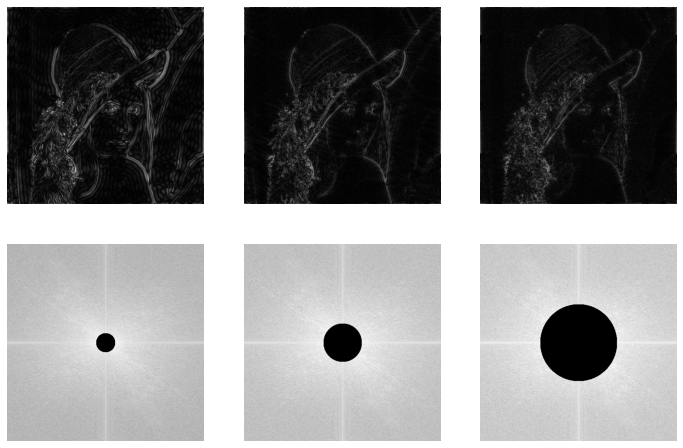

In [8]:
img = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img) # cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
fshift = np.fft.fftshift(f) 
# low pass
plt.figure(figsize=(12,8))

for idx,freq in enumerate([25, 50, 100]):
    high_pass_f = high_pass(fshift.copy(),freq)    
    plt.subplot(2,3,idx+4)
    plt.imshow(np.log(np.abs(high_pass_f)+0.001),cmap='gray')
    #plt.imshow(np.log(cv2.magnitude(low_pass_f[:,:,0],low_pass_f[:,:,1])),cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,3,idx+1)
   # ifft_f = cv2.idft(np.fft.fftshift(low_pass_f))
    ifft_f = np.fft.ifft2(np.fft.fftshift(high_pass_f))
    plt.imshow(np.abs(ifft_f), cmap = 'gray')
    plt.axis('off')

plt.show()

下面範例示範band-pass filtering

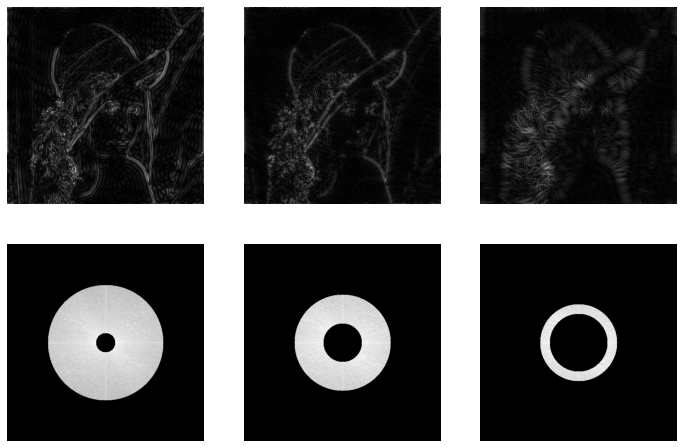

In [9]:
img = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img) # cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
fshift = np.fft.fftshift(f) 
# low pass
plt.figure(figsize=(12,8))

for idx,freq in enumerate([(25,150), (50,125), (75,100) ]):
    band_pass_f = band_pass(fshift.copy(),freq[0],freq[1])    
    plt.subplot(2,3,idx+4)
    plt.imshow(np.log(np.abs(band_pass_f)+0.001),cmap='gray')
    #plt.imshow(np.log(cv2.magnitude(low_pass_f[:,:,0],low_pass_f[:,:,1])),cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,3,idx+1)
   # ifft_f = cv2.idft(np.fft.fftshift(low_pass_f))
    ifft_f = np.fft.ifft2(np.fft.fftshift(band_pass_f))
    plt.imshow(np.abs(ifft_f), cmap = 'gray')
    plt.axis('off')

plt.show()

下面範例示範band-reject filtering

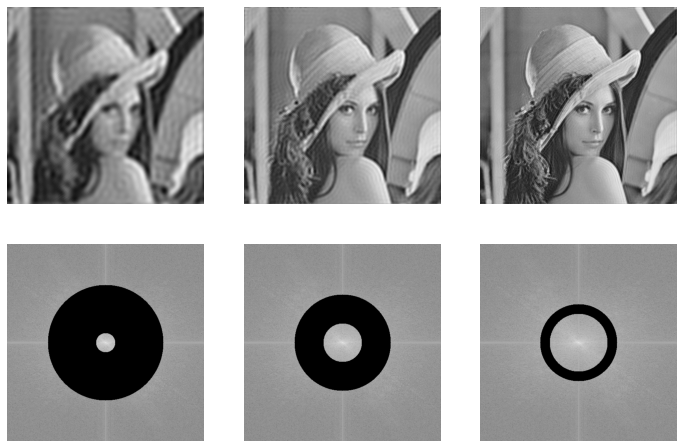

In [10]:
img = cv2.imread(lenna_srcfile,cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img) # cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # produce a two-channel image
fshift = np.fft.fftshift(f) 
# low pass
plt.figure(figsize=(12,8))

for idx,freq in enumerate([(25,150), (50,125), (75,100) ]):
    band_reject_f = band_reject(fshift.copy(),freq[0],freq[1])    
    plt.subplot(2,3,idx+4)
    plt.imshow(np.log(np.abs(band_reject_f)+0.001),cmap='gray')
    #plt.imshow(np.log(cv2.magnitude(low_pass_f[:,:,0],low_pass_f[:,:,1])),cmap='gray')
    plt.axis('off')
    
    plt.subplot(2,3,idx+1)
   # ifft_f = cv2.idft(np.fft.fftshift(low_pass_f))
    ifft_f = np.fft.ifft2(np.fft.fftshift(band_reject_f))
    plt.imshow(np.abs(ifft_f), cmap = 'gray')
    plt.axis('off')

plt.show()

## <span style="color:blue"> 階層式影像表示方式 </span>
常見的階層式影像表示方式如下:

1. 高斯階層式影像表示方式
2. 拉普拉斯階層式影像表示方式
3. 小波階層式影像表示方式

下面函式show_pyramid將img_list每張影像貼在一張更大的影像一次顯示出來，會被接下來的範例呼叫。

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_pyramid(img_list):
    height = 0
    width  = 0
    for img in img_list:
        height += img.shape[0]
        width   = max([width,img.shape[1]])
    disp_img = np.zeros((height, width, 3),dtype=np.float32)
    disp_img[:]=255
    h = 0
    for img in reversed(img_list):
        disp_img[h:h+img.shape[0],0:img.shape[1],[2,1,0]] = np.float32(img)
        h += img.shape[0]
    
    plt.imshow(np.abs(disp_img)/255)
    return  

### <span style="color:blue">使用cv2.pryUp與cv2.pryDown製作高斯與拉普拉斯階層式影像表示方式</span>
cv.pyrDown會將影像先做高斯模糊後再縮小影像。

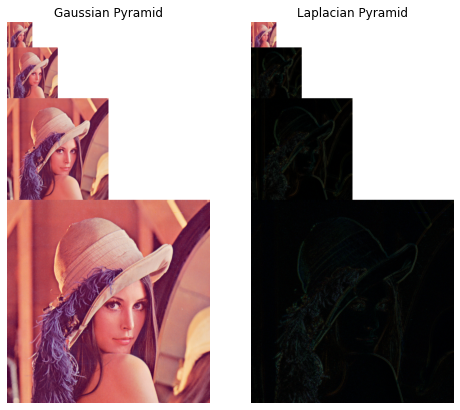

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread(lenna_srcfile)
if img0 is None:
    print('lenna.png is not found')
    
level = 4

img1 = img0.copy()
    
plt.figure(figsize=(8,12))    

# Gaussian Pyramid 老師做兩個 一個是用opencv的函示寫 一個用tensorflow寫
img_list = [img1]
for i in range(1,level): 
    img1 = cv2.pyrDown(img1,(img1.shape[1]//2,img1.shape[0]//2))
    img_list.append(img1)
    
plt.subplot(1,2,1),show_pyramid(img_list),plt.title('Gaussian Pyramid'), plt.axis('off')

# Laplacian Pyramid
img1 = img0.copy()
img_list=[]
for i in range(1,level):        
    img2 = cv2.pyrDown(img1,(img1.shape[1]//2,img1.shape[0]//2))   
    img_list.append(np.float32(img1)-np.float32(cv2.pyrUp(img2,img1.shape)))        
    img1 = img2
else:
    img_list.append(np.float32(img1))
        
plt.subplot(1,2,2),show_pyramid(img_list),plt.title('Laplacian Pyramid'),plt.axis('off')
plt.show()

### <span style="color:blue">使用cv2.GaussianBlur與cv2.resize製作高斯與拉普拉斯階層式影像表示方式</span>
下面示範用cv2.GaussianBlur與cv2.resize製作高斯與拉普拉斯階層式表示方式。因為用cv2.GaussianBlur，因此可以改變高斯模糊程度。

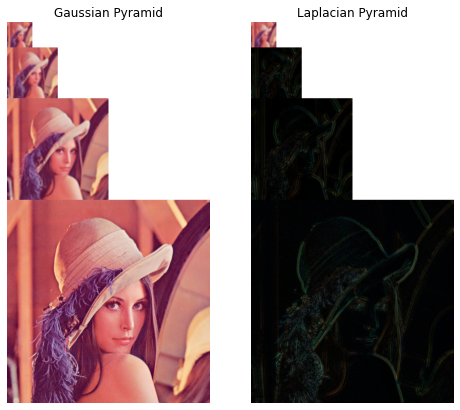

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread(lenna_srcfile)

level = 4
plt.figure(figsize=(8,12))

# Gaussian Pyramid    
img1 = img0.copy()    
img_list=[img1]
for i in range(1,level): 
    img1 = cv2.resize(cv2.GaussianBlur(img1,(9,9),9,9),(img1.shape[1]//2,img1.shape[0]//2))
    img_list.append(img1)
    
plt.subplot(1,2,1),show_pyramid(img_list),plt.title('Gaussian Pyramid'),plt.axis('off')

# Laplacian Pyramid
img1 = img0.copy()  
img_list=[]
for i in range(1,level):        
    img2 = cv2.resize(cv2.GaussianBlur(img1,(9,9),9,9),(img1.shape[1]//2,img1.shape[0]//2))   
    img_list.append(np.float32(img1)-np.float32(cv2.resize(img2,img1.shape[0:2])))        
    img1 = img2
else:
    img_list.append(np.float32(img1))
    
plt.subplot(1,2,2),show_pyramid(img_list),plt.title('Laplacian Pyramid'),plt.axis('off')
plt.show()

### tensorflow範例

影像在tensorflow裡是用(batch,height,width,channel)4維張量表示。一張高480、寬640、3通道影像，在tensorflow裡是一個(1,480,640,3)的張量。

(9, 9)


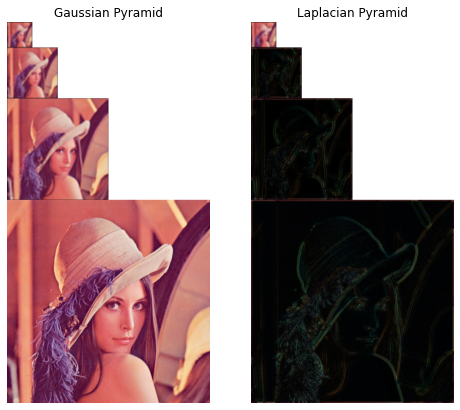

In [14]:
# 示範怎麼把高斯的kernal擺上去
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

img0 = cv2.imread(lenna_srcfile).astype(np.float32)

gkernel   = cv2.getGaussianKernel(9,9.) # 9x9的矩陣來放 吐一塊9x9的高斯kernal 呼叫opencv幫我填高斯的kernal 目的: 三個通道每個通道分別做高斯模糊
gfilter2d = np.dot(gkernel,gkernel.T)
print(gfilter2d.shape)

filters = np.zeros((9,9,3,3)) #宣告張量
for i in range(3):
    filters[:,:,i,i] = gfilter2d 

level = 4
plt.figure(figsize=(8,12))

# Gaussian Pyramid    
img1 = img0.copy()    
img_list=[img1]
for i in range(1,level): # tf.newaxis 擴增一軸 tf.squeeze把惟度為1的拔掉->給opencv
    img1 = tf.squeeze(tf.image.resize(tf.nn.conv2d(img1[tf.newaxis,...],filters,1,'SAME'),(img1.shape[0]//2,img1.shape[1]//2)))
    img_list.append(img1.numpy().astype(np.uint8))
    
plt.subplot(1,2,1),show_pyramid(img_list),plt.title('Gaussian Pyramid'),plt.axis('off')

# Laplacian Pyramid
img1 = img0.copy().astype(np.float32)  
img1 = img1[np.newaxis,...]
img_list=[]
for i in range(1,level):        
    img2 = tf.image.resize(tf.nn.conv2d(img1,filters,1,'SAME'),(img1.shape[1]//2,img1.shape[2]//2))   
    img_list.append(tf.squeeze(img1-tf.image.resize(img2,img1.shape[1:3])).numpy())        
    img1 = img2
else:
    img_list.append(np.float32(tf.squeeze(img1)))
    
plt.subplot(1,2,2),show_pyramid(img_list),plt.title('Laplacian Pyramid'),plt.axis('off')
plt.show()


## <span style="color:blue">使用Deep features</span>
某些應用可以使用深度學習所得到的特徵，一般稱為Deep features。下面示範如何取得輸入影像在VGG16某些Layer的輸出，作為輸入影像的Deep features。下圖是VGG16的結構。
<figure><img src="https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png" alt="VGG16" width="500"/><figcaption>VGG16結構(https://www.cs.toronto.edu/~frossard/post/vgg16/)</figcaption></figure>

In [15]:
import os
       
# Make Keras use the TensorFlow backend. This statement must be executed before importing Keras.
if 'KERAS_BACKEND' in os.environ and os.environ['KERAS_BACKEND'] != 'tensorflow':
    os.environ['KERAS_BACKEND'] = 'tensorflow'

import numpy as np
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg16_model = VGG16() # create a VGG16 DCNN
vgg16_model.summary() # show the structure of the VGG16

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

載入測試影像

(-0.5, 223.5, 223.5, -0.5)

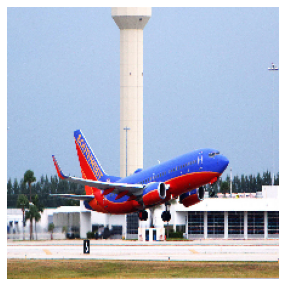

In [16]:
url='https://tronclass.ntou.edu.tw/api/uploads/1842793/in-rich-content?created_at=2021-04-23T04:24:31Z'
airport_file=tf.keras.utils.get_file('airport2',origin=url)

img1 = cv2.resize(cv2.imread(airport_file),(224,224))
plt.figure(figsize = (5, 5))
plt.imshow(img1[:,:,::-1])
plt.axis('off')

In [17]:
# classify the input image
preds = vgg16_model.predict(preprocess_input(img1[np.newaxis,:,:,::-1]))
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 93.10%
2. wing: 4.68%
3. warplane: 1.63%
4. airship: 0.44%
5. missile: 0.07%


### fc2 deep features
+ 若宣告時使用VGG16(include_top = False)，那麼此模型不會包含最後3個全連接層。vgg16_model.predict將會輸出block5_pool那層的輸出。
+ 若要抽取fc2 deep features，可以根據VGG16定義一個模型:輸入為model.input,輸出為'fc2'的輸出。此模型可用來抽取輸入影像之fc2 deep features。

In [18]:
deep_feat = Model(inputs = vgg16_model.input,outputs=vgg16_model.get_layer('fc2').output)

如果也想辨識，又不希望VGG16執行兩次，那麼就建一個Model將fc2的輸出餵入'predictions'那層的輸入。

In [19]:
input_deep_feat = Input(shape=(4096,))
classifier = Model(inputs=input_deep_feat,outputs=vgg16_model.get_layer('predictions')(input_deep_feat))

顯示這兩個模型的架構

In [20]:
deep_feat.summary()
classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

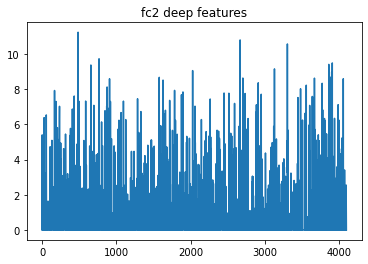

In [21]:
# extract fc2 deep features
deep_feature = deep_feat.predict(preprocess_input(np.expand_dims(np.asarray(img1[:,:,::-1],dtype=float), axis= 0))).ravel()
plt.title('fc2 deep features')
plt.plot(deep_feature)
plt.show()

In [22]:
# classify the input image
preds = classifier.predict(deep_feature[np.newaxis,...])
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 93.10%
2. wing: 4.68%
3. warplane: 1.63%
4. airship: 0.44%
5. missile: 0.07%


也可以這麼做

In [23]:
vgg16_fc2 = Model(inputs=vgg16_model.input,outputs=[vgg16_model.output,vgg16_model.get_layer('fc2').output])

preds,fc2_feature  = vgg16_fc2.predict(preprocess_input(np.expand_dims(np.asarray(img1[:,:,::-1],dtype=float), axis= 0)))
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 93.10%
2. wing: 4.68%
3. warplane: 1.63%
4. airship: 0.44%
5. missile: 0.07%


下面示範抽取'block4_pool' deep features。

In [24]:
# extract block4_pool deep feature
block4_pool_feat = Model(inputs = vgg16_model.input,outputs=vgg16_model.get_layer('block4_pool').output)

# connect the layers from the block4_pool layer to the predictions layer
block4_pool_deep_feat = Input(shape=(14,14,512))
x = vgg16_model.get_layer('block5_conv1')(block4_pool_deep_feat)
x = vgg16_model.get_layer('block5_conv2')(x)
x = vgg16_model.get_layer('block5_conv3')(x)
x = vgg16_model.get_layer('block5_pool')(x)
x = vgg16_model.get_layer('flatten')(x)
x = vgg16_model.get_layer('fc1')(x)
x = vgg16_model.get_layer('fc2')(x)
classifier2 = Model(inputs=block4_pool_deep_feat,outputs=vgg16_model.get_layer('predictions')(x))
block4_pool_feat.summary()
classifier2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

定義完架構後，以後對輸入影像執行下面步驟即可抽取block4_pool deep feature及辨識其類別。

In [25]:
# extrack block4_pool deep features
block4_pool_deep_feature = block4_pool_feat.predict(preprocess_input(np.expand_dims(np.asarray(img1[:,:,::-1],dtype=float), axis= 0))).ravel()

preds = classifier2.predict(block4_pool_deep_feature.reshape(1,14,14,512))
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 93.10%
2. wing: 4.68%
3. warplane: 1.63%
4. airship: 0.44%
5. missile: 0.07%


若要同時做辨識與取得deep feature，那麼就是這麼做:

In [26]:
clf_block4_pool_feat = Model(inputs = vgg16_model.input,outputs=[vgg16_model.output,vgg16_model.get_layer('block4_pool').output])

preds, deep_feature  = clf_block4_pool_feat.predict(preprocess_input(np.expand_dims(np.asarray(img1[:,:,::-1],dtype=float), axis= 0)))

P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. airliner: 93.10%
2. wing: 4.68%
3. warplane: 1.63%
4. airship: 0.44%
5. missile: 0.07%


## 資料結構: 張量 (Tensor)

tensorflow必須將資料以張量表示才能運作。張量是一個多階(rank)或稱多軸(axis)的結構。非常通用，例如

<div>
<img src="attachment:tensor.png" width="600" align="right">
</div>

+ 純量(Scalar):0階張量,數字。
+ 向量(Vector):1階張量,$[x_{1},x_{2},...,x_{d}]^{T}$。
    
+ 矩陣(Matrix):2階張量,
$
\left[
\begin{array}{cccc}
a_{11}&a_{12}&...&a_{1n}\\\
a_{21}&a_{22}&...&a_{2n}\\\
\vdots&   &  & \vdots \\
a_{m1}&a_{m2}&...&a_{mn}\\\
\end{array}
\right]
$
+ 3階以上統稱張量


numpy裡張量資料結構(ndarray)重要屬性:
+ 軸的數量(ndim)
+ 形狀(shape)
+ 資料型別(dtype)

以下面為例:
+ x為4階張量
  + rank: 4
  + shape是(3,4,5,6)
  + dtype(每個資料類型)是np.float
  + 每一階所含元素個數稱該階的維度(dimension)，x為$3\times4\times5\times6$維的4階張量。
+ a為0階張量。
  + rank: 0
  + shape是()
  + dtype(每個資料類型)是np.float
  + 含有一個元素

In [27]:
import numpy as np
x = np.ndarray(shape=(3,4,5,6),dtype=float)
print("x rank:",x.ndim)
print("x shape:",x.shape)
print("x dtype:",x.dtype)
print("x size:",x.size)
print('-'*20)
a = np.array(1,dtype=float)
print("a rank:",a.ndim)
print("a shape:",a.shape)
print("a shape:",a.dtype)
print("a size:",a.size)

x rank: 4
x shape: (3, 4, 5, 6)
x dtype: float64
x size: 360
--------------------
a rank: 0
a shape: ()
a shape: float64
a size: 1


### 以張量安排資料集範例 

<table>
    <tr><th style="text-align:center">實例</th><th style="text-align:center">樣本張量結構(shape)</th><th style="text-align:center">樣本集張量結構(shape)</th></tr>
    <tr><td style="text-align:left">樣本可用向量表示</td><td style="text-align:left">(features,)</td><td style="text-align:left">(samples,features)</td></tr>
    <tr><td style="text-align:left">(時間)序列樣本</td><td style="text-align:left">(timesteps,features)</td><td style="text-align:left">(samples,timesteps,features)</td></tr>
    <tr><td style="text-align:left">影像樣本(channel last)</td><td style="text-align:left">(height,width,channel)</td><td style="text-align:left">(samples,height,width,channel)</td></tr>
    <tr><td style="text-align:left">影像樣本(channel first)</td><td style="text-align:left">(channel,height,width)</td><td style="text-align:left">(samples,channel,height,width)</td></tr>
    <tr><td style="text-align:left">視訊樣本(channel last)</td><td style="text-align:left">(frames,height,width,channel)</td><td style="text-align:left">(samples,frames,height,width,channel)</td></tr>
    <tr><td style="text-align:left">視訊樣本(channel first)</td><td style="text-align:left">(frames,channel,height,width)</td><td style="text-align:left">(samples,frames,channel,height,width)</td></tr>
</table>


### 張量操作
下面列出常用的張量操作。
+ 張量重塑(reshape):改變張量的形狀，條件是改變前後其元素總數不變。
+ 張量切片(slicing):選擇張量某些元素、某個軸的元素、某些索引間的元素。
+ 張量擴張(broadcasting):兩個形狀不符的張量在做元素間四則運算時，會先用張量擴張將這兩個張量形狀變成一致後再運算。若無法以張量擴張規則將這兩個張量形狀變成一致，則此運算將無法運行。
+ 張量點積(dot)運算:千萬不要與*(張量元素對乘搞混)。
+ 張量轉置(transposition)

下面藉由mnist字元影像資料集來解釋各個操作。

In [28]:
import tensorflow as tf
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

#### 張量重塑(reshape)
x_train包含60000個樣本，每個樣本為height:28，width:28的影像。

In [29]:
print(x_train.shape)

(60000, 28, 28)


將每個樣本重塑成(784,)維度的向量。由於重塑前後元素總數不變，也可以用指令下面辦到

     x1_train = np.reshape(x_train,(-1,28*28))
其中第0軸維度-1指的是reshape根據重塑前後元素總數不變原則自己算。

In [30]:
x1_train = np.reshape(x_train,(60000,28*28)) 
#x1_train = x_train.np.reshape((60000,28*28))  
print(x1_train.shape)

(60000, 784)


#### 張量切片(slicing)
+ x_train[s:e]取得x索引從s,s+1,...,至e-1。
+ x_train[s:e:2]取得x索引從s,s+2,...,至小於e。
+ x_train[s:e,:,:]，其中:代表從頭到尾。
+ x_train[s:e,:,::-1]，其中::-1代表從尾到頭。
+ x_train[:e]，從0,...,e-1。
+ x_train[:-1]，從0,...,倒數第2個。
+ x_train[5:]，從5,...,到最後一個。
+ 還有許多寫法，碰到再說。

<table>
<tr><td>    
<div>
    <img src="https://tronclass.ntou.edu.tw/api/uploads/1842394/in-rich-content?created_at=2021-04-23T02:55:45Z" width="200">
</div>
    </td>
    </tr>
    <tr><td>相同顏色指令選取相同顏色的元素</td></tr>
</table> 

In [31]:
x2 = x_train[10:20] #第10到第19樣本
print('x2.shape:',x2.shape)
x3 = x_train[10:20,0,:] #第10到第19樣本，每個樣本的第0列
print('x3.shape:',x3.shape)
x4 = x_train[10:20,0:1,:] #第10到第19樣本，每個樣本的第0列，若要保持張量的階數可以這樣寫。
print('x4.shape:',x4.shape)

x2.shape: (10, 28, 28)
x3.shape: (10, 28)
x4.shape: (10, 1, 28)


#### 張量擴張(broadcasting)
<div>
<img src="https://tronclass.ntou.edu.tw/api/uploads/1842427/in-rich-content?created_at=2021-04-23T02:58:08Z" width="600">
</div>   


#### 張量點積(dot)運算
np.dot(a,b): a與b形狀分別為下面形狀時點積運算結果的形狀
+ $a:(m, ), b:(m,) \rightarrow ()$ 向量內積
+ $a:(m,n), b:(n,k)\rightarrow (m,k)$ 矩陣相乘
+ 若a或b是純量$\rightarrow a*b$ 矩陣乘純量
+ $a:(d_{1},d_{2},...,d_{n}), b:(d_{n},)\rightarrow(d_{1},d_{2},...,d_{n-1})$
+ $a:(d_{1},d_{2},...,d_{n},u), b:(d'_{1},...,d'_{m-1},u,d'_{m})\rightarrow(d_{1},d_{2},...,d_{n},d'_{1},...,d'_{m})$

In [32]:
#1
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.dot(a,b)
print('#1:',c.shape,c)

#2
a = np.random.randn(3,4)
b = np.random.randn(4,5)
c = np.dot(a,b)
print('#2:',c.shape)

#3
a = np.random.randn(3,4)
b = 7
c = np.dot(a,b)
print('#3:',c.shape)

#4
a = np.random.randn(3,4,5,6)
b = np.random.randn(6)
c = np.dot(a,b)
print('#4:',c.shape)

#5
a = np.random.randn(3,4,5,6)
b = np.random.randn(1,2,6,3)
c = np.dot(a,b)
print('#5:',c.shape)


#1: () 32
#2: (3, 5)
#3: (3, 4)
#4: (3, 4, 5)
#5: (3, 4, 5, 1, 2, 3)


In [33]:
# 計算前100樣本兩兩間距離
x = x_train[:100].reshape((-1,np.prod(x_train.shape[1:])))
n2  = np.sum(x**2,axis=1)
dist= (n2.reshape((-1,1))+n2.reshape((1,-1))-2*np.dot(x,x.T))**0.5

#### 張量轉置
張量軸重新排列。
<div>
    <img src="attachment:numy_transpose.jpg" width="500">
</div>   

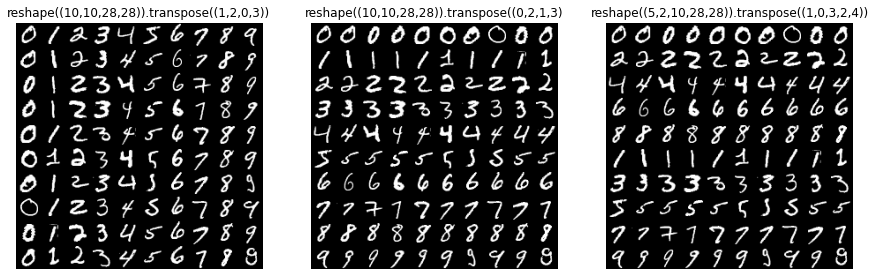

In [34]:
import matplotlib.pyplot as plt

sample_id = []
for i in range(10):
    p = np.argwhere(y_train==i).ravel()[:10]
    sample_id.extend(p)
sel_img = x_train[sample_id]  
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sel_img.reshape((10,10,28,28)).transpose((1,2,0,3)).reshape((-1,280)),cmap='gray')
plt.axis(False)
plt.title('reshape((10,10,28,28)).transpose((1,2,0,3))')
plt.subplot(1,3,2)
plt.imshow(sel_img.reshape((10,10,28,28)).transpose((0,2,1,3)).reshape((-1,280)),cmap='gray')
plt.axis(False)
plt.title('reshape((10,10,28,28)).transpose((0,2,1,3)')
plt.subplot(1,3,3)
plt.imshow(sel_img.reshape((5,2,10,28,28)).transpose((1,0,3,2,4)).reshape((-1,280)),cmap='gray')
plt.axis(False)
plt.title('reshape((5,2,10,28,28)).transpose((1,0,3,2,4))')
plt.show()

### 作業
請問a,b,c,d,e分別為甚麼，
<pre>
plt.figure(figsize=(5,5))
plt.imshow(sel_img.reshape((5,2,10,28,28)).transpose((a,b,c,d,e)).reshape((-1,280)),cmap='gray')
plt.axis(False)
plt.show()
</pre>
此程式可以輸出這般圖樣。
<pre>
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
    0246813579
</pre>    
